In [1]:
data = tsc.loadSeriesLocal('/mnt/downloads/goodfish_alltrialst.mat', inputformat='mat', varname='goodfish_alltrials', minPartitions=16)

In [41]:
data=data.normalize(baseline='percentile')
data.cache()

In [42]:
from thunder import PCA
modelPCA = PCA(k=5,svdmethod='em').fit(data)

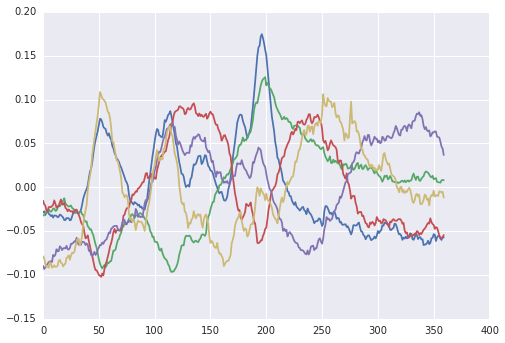

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.plot(modelPCA.comps.T);

In [44]:
from thunder import PCA
modelPCA2 = PCA(k=5,svdmethod='direct').fit(data)

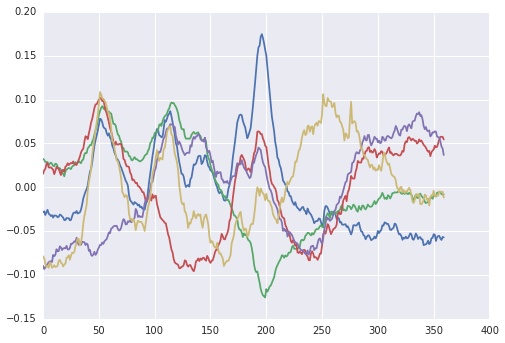

In [45]:
plt.plot(modelPCA2.comps.T);

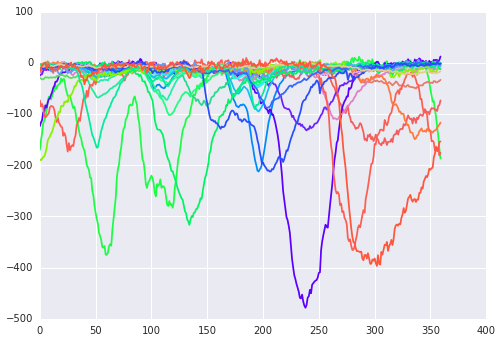

In [46]:
from thunder import KMeans
modelK = KMeans(k=30).fit(data)
from thunder import Colorize
sns.set_style('darkgrid')
newclrs = Colorize.optimize(modelK.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

In [47]:
from thunder import NMF
modelNMF = NMF(k=5, maxiter=40).fit(data)
sns.set_style('darkgrid')
plt.plot(modelNMF.h.T);

Initializing NMF
finished als iteration 0 with convergence = 24.227376 in H


LinAlgError: Singular matrix

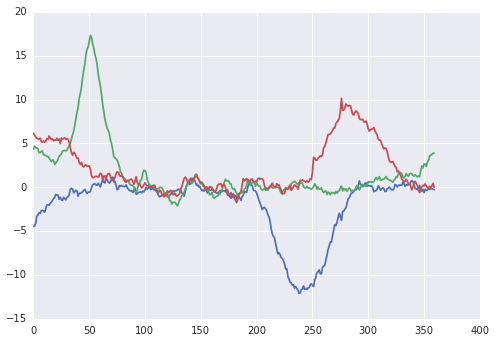

In [48]:
from thunder import ICA
modelICA = ICA(k=10,c=3).fit(data)
sns.set_style('darkgrid')
plt.plot(modelICA.a)

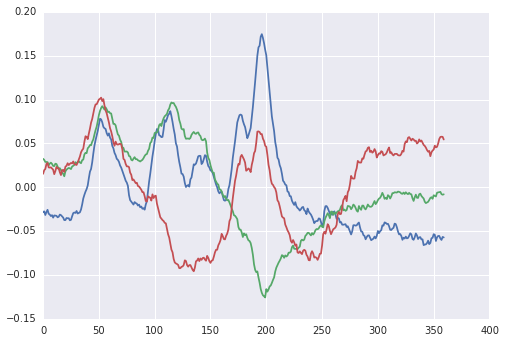

In [49]:
from thunder import PCA
modelPCA3 = PCA(k=3).fit(data)
sns.set_context('notebook')
sns.set_style('darkgrid')
plt.plot(modelPCA3.comps.T)

In [50]:
import pyspark.mllib.clustering as mllib
from numpy import array
from math import sqrt

In [51]:
vis1=data.between(30,84)
vis2=data.between(90,124)
vis3=data.between(130,154)
vis4=data.between(160,214)
lat=data.between(253,303)
aud=data.between(300,344)

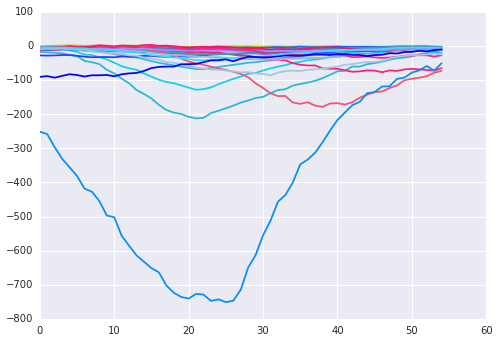

In [52]:
model1 = KMeans(k=20).fit(vis1)
newclrs = Colorize.optimize(model1.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model1.centers.T);

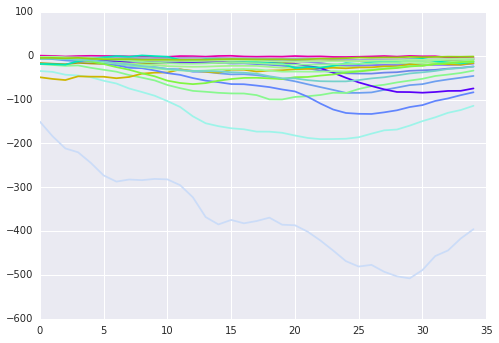

In [53]:
model2 = KMeans(k=20).fit(vis2)
newclrs = Colorize.optimize(model2.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model2.centers.T);

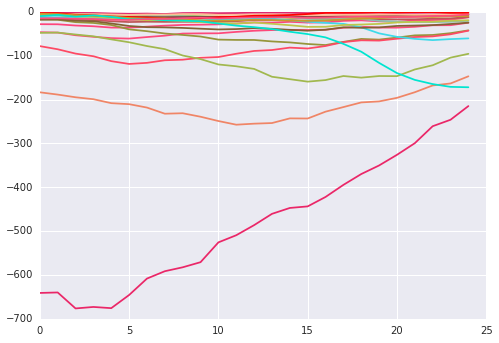

In [54]:
model3 = KMeans(k=20).fit(vis3)
newclrs = Colorize.optimize(model3.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model3.centers.T);

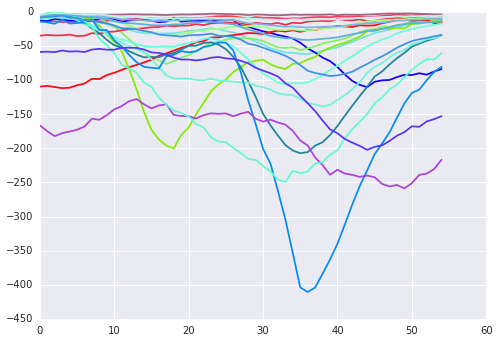

In [ ]:
model4 = KMeans(k=20).fit(vis4)
newclrs = Colorize.optimize(model4.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(model4.centers.T);

In [ ]:
modela = KMeans(k=20).fit(aud)
newclrs = Colorize.optimize(modela.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modela.centers.T);

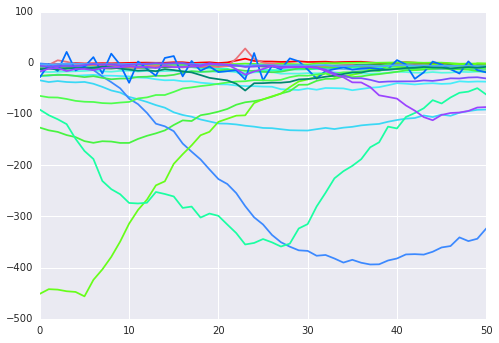

In [ ]:
modell = KMeans(k=20).fit(lat)
newclrs = Colorize.optimize(modell.centers, ascmap=True)
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modell.centers.T);

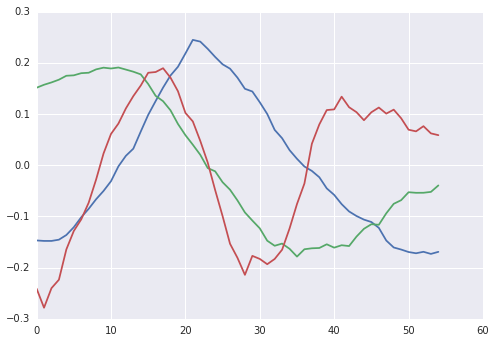

In [ ]:
from thunder import PCA
modelp1 = PCA(k=3).fit(vis1)
plt.plot(modelp1.comps.T);

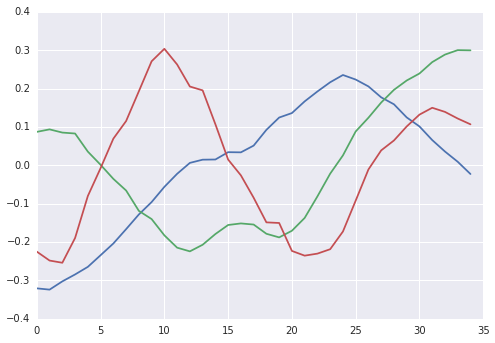

In [ ]:
modelp2 = PCA(k=3).fit(vis2)
plt.plot(modelp2.comps.T);

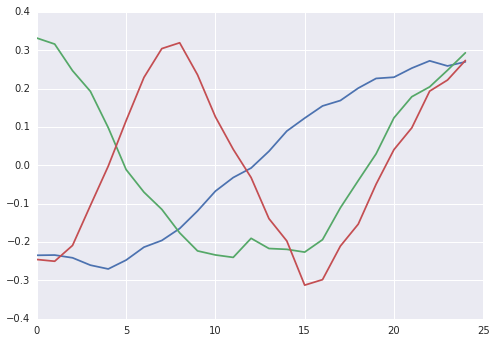

In [ ]:
modelp3 = PCA(k=3).fit(vis3)
plt.plot(modelp3.comps.T);

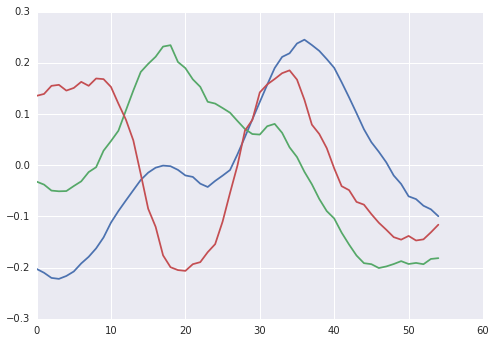

In [ ]:
modelp4 = PCA(k=3).fit(vis4)
plt.plot(modelp4.comps.T);

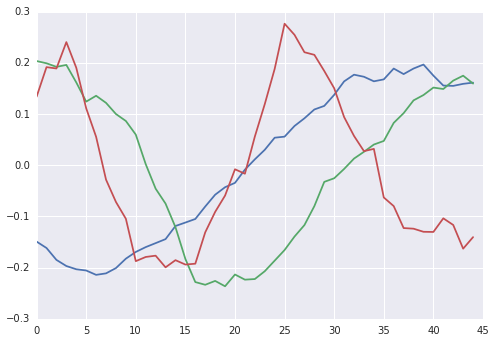

In [ ]:
modelpa = PCA(k=3).fit(aud)
plt.plot(modelpa.comps.T);

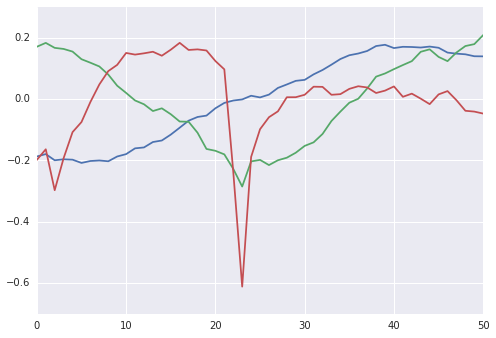

In [ ]:
modelpl = PCA(k=3).fit(lat)
plt.plot(modelpl.comps.T);

In [ ]:
import numpy as np
import scipy.io

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/Kmeanscenter.mat', mdict={'vis1':model1.centers.T,'vis2':model2.centers.T,'vis3':model3.centers.T,'vis4':model4.centers.T,'lat':modell.centers.T,'aud':modela.centers.T}, oned_as='column', do_compression='true')

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/PCAcomp.mat', mdict={'vis1':modelp1.comps.T,'vis2':modelp2.comps.T,'vis3':modelp3.comps.T,'vis4':modelp4.comps.T,'lat':modelpl.comps.T,'aud':modelpa.comps.T}, oned_as='column', do_compression='true')

In [ ]:
labels1= model1.predict(vis1).rdd.values().collect()
labels2= model2.predict(vis2).rdd.values().collect()
labels3= model3.predict(vis3).rdd.values().collect()
labels4= model4.predict(vis4).rdd.values().collect()
labelsa= modela.predict(aud).rdd.values().collect()
labelsl= modell.predict(lat).rdd.values().collect()
scipy.io.savemat('/mnt/downloads/alltrials/Kmeanspredict.mat', mdict={'vis1p':labels1,'vis2p':labels2,'vis3p':labels3,'vis4p':labels4,'lat':labelsl,'aud':labelsa}, oned_as='column', do_compression='true')

In [ ]:
scores1 = modelp1.scores.rdd.values().collect()
scores2 = modelp2.scores.rdd.values().collect()
scores3 = modelp3.scores.rdd.values().collect()
scores4= modelp4.scores.rdd.values().collect()
scoresl = modelpl.scores.rdd.values().collect()
scoresa = modelpa.scores.rdd.values().collect()
scipy.io.savemat('/mnt/downloads/alltrials/PCAscores.mat', mdict={'vis1scores':scores1,'vis2scores':scores2,'vis3scores':scores3,'vis4scores':scores4,'lat':scoresl,'aud':scoresa}, oned_as='column', do_compression='true')

In [ ]:
from thunder import ICA
modeli1 = ICA(k=20,c=3).fit(vis1)
modeli2 = ICA(k=20,c=3).fit(vis2)
modeli3 = ICA(k=20,c=3).fit(vis3)
modeli4 = ICA(k=20,c=3).fit(vis4)
modelil = ICA(k=20,c=3).fit(lat)
modelia = ICA(k=20,c=3).fit(aud)

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/ICAcomp.mat', mdict={'vis1_ICA':modeli1.a,'vis2_ICA':modeli2.a,'vis3_ICA':modeli3.a,'vis4_ICA':modeli4.a,'lat_ICA':modelil.a,'aud_ICA':modelia.a}, oned_as='column', do_compression='true')

In [ ]:
ICA_a1= modeli1.sigs.rdd.values().collect()
ICA_a2= modeli2.sigs.rdd.values().collect()
ICA_a3= modeli3.sigs.rdd.values().collect()
ICA_a4= modeli4.sigs.rdd.values().collect()
ICA_al= modelia.sigs.rdd.values().collect()
ICA_aa= modelil.sigs.rdd.values().collect()

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/ICAsigs.mat', mdict={'vis1_ICA_sigs':ICA_a1,'vis2_ICA_sigs':ICA_a2,'vis3_ICA_sigs':ICA_a3,'vis4_ICA_sigs':ICA_a4,'lat_ICA_sigs':ICA_al,'aud_ICA_sigs':ICA_aa}, oned_as='column', do_compression='true')

In [ ]:
from thunder import NMF
modelN1 = NMF(k=3, maxiter=30).fit(vis1)
modelN2 = NMF(k=3, maxiter=30).fit(vis2)
modelN3 = NMF(k=3, maxiter=30).fit(vis3)
modelN4 = NMF(k=3, maxiter=30).fit(vis4)
modelNl = NMF(k=3, maxiter=30).fit(lat)
modelNa = NMF(k=3, maxiter=30).fit(aud)

Initializing NMF
finished als iteration 0 with convergence = 6.902692 in H
finished als iteration 1 with convergence = 1.268553 in H
finished als iteration 2 with convergence = 0.614270 in H
finished als iteration 3 with convergence = 0.244729 in H
finished als iteration 4 with convergence = 0.283388 in H
finished als iteration 5 with convergence = 0.351988 in H
finished als iteration 6 with convergence = 0.315968 in H
finished als iteration 7 with convergence = 0.258322 in H
finished als iteration 8 with convergence = 0.180174 in H
finished als iteration 9 with convergence = 0.100857 in H
finished als iteration 10 with convergence = 0.050996 in H
finished als iteration 11 with convergence = 0.028074 in H

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/NMFcomp.mat', mdict={'vis1_NMF':modelN1.h.T,'vis2_NMF':modelN2.h.T,'vis3_NMF':modelN3.h.T,'vis4_NMF':modelN4.h.T,'lat_NMF':modelNl.h.T,'aud_NMF':modelNa.h.T}, oned_as='column', do_compression='true')

In [ ]:
NMF_a1= modelN1.w.rdd.values().collect()
NMF_a2= modelN2.w.rdd.values().collect()
NMF_a3= modelN3.w.rdd.values().collect()
NMF_a4= modelN4.w.rdd.values().collect()
NMF_aa= modelNa.w.rdd.values().collect()
NMF_al= modelNl.w.rdd.values().collect()

In [ ]:
scipy.io.savemat('/mnt/downloads/alltrials/NMFsigs.mat', mdict={'vis1_NMF_w':NMF_a1,'vis2_NMF_w':NMF_a2,'vis3_NMF_w':NMF_a3,'vis4_NMF_w':NMF_a4,'lat_NMF_w':NMF_al,'aud_NMF_w':NMF_aa}, oned_as='column', do_compression='true')